<a href="https://colab.research.google.com/github/sophspilio/-geo-pandas_tutorial/blob/main/pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas!!! don't just eat bamboo 
### A Tutorial
🐼🐍🐼🐍



### Sources
[Pandas Documentation ](https://pandas.pydata.org/docs/getting_started/index.html)

[User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) 

[Helpful Tutorial Overview](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/)

[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) 

[NPS Projections in Geopandas](https://stackoverflow.com/questions/55646598/polar-stereographic-projection-of-geopandas-world-map)

[Geopandas Map Making](https://geopandas.org/mapping.html) 


# Importing and Reading using Pandas 

In [ ]:
!pip install geopandas #install geopandas
#import libraries
import pandas as pd
import geopandas as gpd

In [ ]:
#Create a dictionary of a database 
dict = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

#print out tab data 
brics = pd.DataFrame(dict)
print(brics)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') 
root_path = 'gdrive/My Drive/(geo)pandas_tutorial_final/' # set root path

In [3]:
#import .csv and call the data 
spm19 = pd.read_csv(root_path+"spm19_proc_blanks.csv")
mean_sic = pd.read_csv(root_path+"1981-2010_SIC_Daily.csv")

In [ ]:
#call the first 4 rows
#use .head() to start from the beginning of the data, use .tail() to start at the end 
spm19.head(4)

#check data types for all columns 
spm19.dtypes 

#find more detailed info on the data 
spm19.info()

In [ ]:
#descriptive statistics of data frame 
spm19.describe()
#to call a specific column
spm19["Pre-Weight 1"].describe()

[.loc vs .iloc](https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/) 

**loc** needs the *name* of the row and column to be filtered 

**iloc** inedex based, *index* using integer index 

In [ ]:
#selecting specific rows and columns using indexes 
spm19.iloc [3:7,4:]
#can assign new values to specific cells 
#spm19.iloc[0:3,3] = "invalid"

# Maniuplating the Data 

In [ ]:
#select a column
spm19["Pre-Weight 1"]

#select a column and run a stat
spm19["Pre-Weight 1"].sum #OR TRY .median(), .mean(), .mode(), .nunique() for numner of unique entries, .max(), .min()

#select multiple columns 
spm19[["Pre-Weight 1","Post Weight 1"]]

In [ ]:
#renaming columns by creating a dictionary 
#using inplace to change dataframe without an assignment
spm19.rename(columns = {"Pre-Weight 1": "PreW1","Pre Weight 2":"PreW2","Pre-Weight 3": "PreW3","Average":"PreAvg","Post Weight 1": "PostW1","Post Weight 2": "PostW2","Post Weight 3": "PostW3","Post-Average":"PostAvg"},inplace = True)
spm19.head()

In [ ]:
#get rid of sample standard deviation data, we don't need it for this 
#df.drop(df.iloc[:, 1:3], inplace = True, axis = 1) 
mean_sic.drop(mean_sic.iloc[:,2:18:2], inplace= True, axis =1)


In [ ]:
mean_sic

#Make some Plots! 

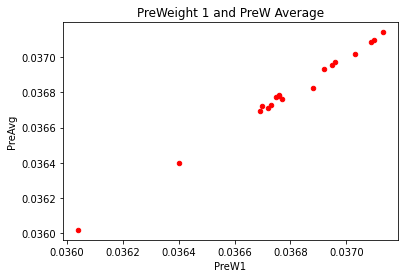

In [9]:
#scatter plot! 
spm19.plot.scatter(x = "PreW1", y = "PreAvg", c = 'red', title = 'PreWeight 1 and PreW Average') 
# x for x parameter , y for y parameter,  c for color of point 

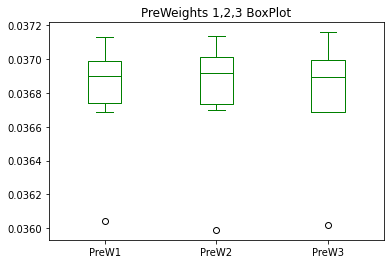

In [10]:
#box plot!
#create a subset of the data uisng iloc and selecting on the the three pre-weight columns
preweights = spm19.iloc[ :12,4:7]
preweights.plot.box(color = 'green', title = 'PreWeights 1,2,3 BoxPlot')

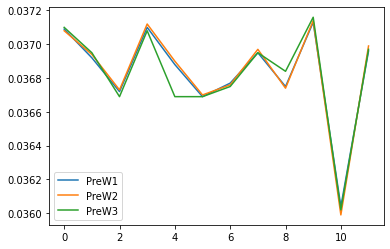

In [ ]:
preweights.plot.line()